In [233]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook as tqdm
%matplotlib inline

In [234]:
image_test_list = []
for i in range(5):
    for j in range(5):
        for k in range(5): 
            image_test_list.append(np.array([np.uint8(i*50),np.uint8(j*50),np.uint8(k*50)]))
image_test_list = np.array([list(image_test_list)])

In [235]:
img_amelie = cv2.imread('./imgs/escher_1.png')
img_amelie = cv2.resize(img_amelie, (50, 25)) 
#img_amelie = image_test_list

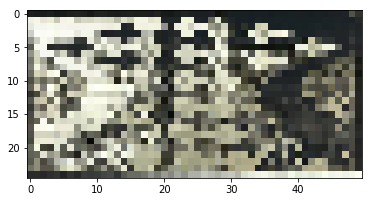

In [236]:
plt.imshow(cv2.cvtColor(img_amelie, cv2.COLOR_BGR2RGB))
plt.show()

In [237]:
def norm(x):
    return (int(x[0])**(2) + int(x[1])**(2) + int(x[2])**(2))**(1/2)

In [238]:
def distance_between(x,y):
    return ((int(x[0])-int(y[0]))**(2) + (int(x[1])-int(y[1]))**(2) + (int(x[2])-int(y[2]))**(2))**(1/2)

In [239]:
norm([1,1,1])

1.7320508075688772

### First signature

In [240]:
img_reshaped = np.reshape(img_amelie, (img_amelie.size//3,3))
img_reshaped_array = np.array([img_reshaped])

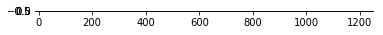

In [241]:
plt.imshow(cv2.cvtColor(img_reshaped_array, cv2.COLOR_BGR2RGB))
plt.show()

In [242]:
resized_image = cv2.resize(img_reshaped_array, (500, 100)) 

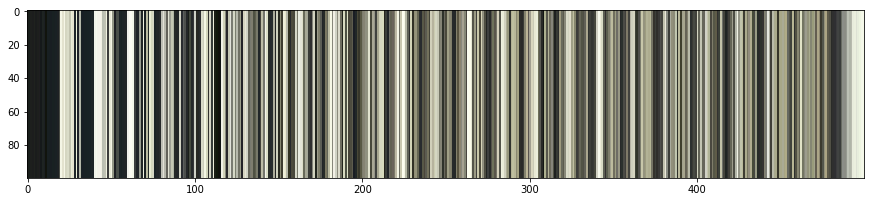

In [243]:
plt.figure(figsize=(15,5))
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

### Second signature

In [244]:
img_series = pd.Series(list(img_reshaped))

In [245]:
img_series.head(5)

0    [30, 31, 31]
1    [25, 29, 24]
2    [25, 27, 24]
3    [29, 32, 25]
4    [22, 26, 20]
dtype: object

In [246]:
img_series.index = img_series.apply(norm)

In [247]:
img_series = img_series.sort_index()

In [248]:
img_reshaped_array = np.array([list(img_series)])

In [249]:
resized_image = cv2.resize(img_reshaped_array, (500, 100)) 

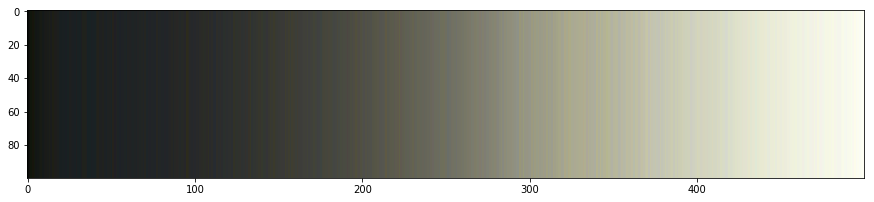

In [250]:
plt.figure(figsize=(15,5))
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

### Third signature

In [251]:
img_series = pd.Series(list(img_reshaped))

In [252]:
img_series.index = img_series.apply(norm)

In [253]:
img_series = img_series.sort_index()

In [254]:
array_len = len(img_series)
for i in tqdm(range(array_len)):
    img_series_copy = img_series.copy()
    previous_series = img_series_copy.head(i)
    next_series = img_series_copy.tail(len(img_series_copy)-i)
    if len(previous_series) > 0:
        last_element = previous_series.tail(1)
        next_series.index = next_series.apply(lambda x:distance_between(x,last_element.values[0]))
        next_series = next_series.sort_index()
    img_series = pd.concat([previous_series, next_series])

HBox(children=(IntProgress(value=0, max=1250), HTML(value='')))

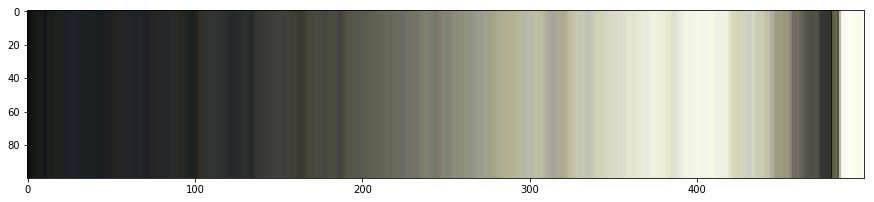

In [255]:
img_reshaped_array = np.array([list(img_series)])
resized_image = cv2.resize(img_reshaped_array, (500, 100)) 
plt.figure(figsize=(15,5))
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

### Fourth signature